# Answer 1 :  Propensity score matching

## 1.1 The Naive Method

We first import and load the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn import linear_model


In [2]:
def load_data(filename):
    df = pd.read_csv(filename)
    return df

In [3]:
filename = r'./lalonde.csv'
df = load_data(filename)
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


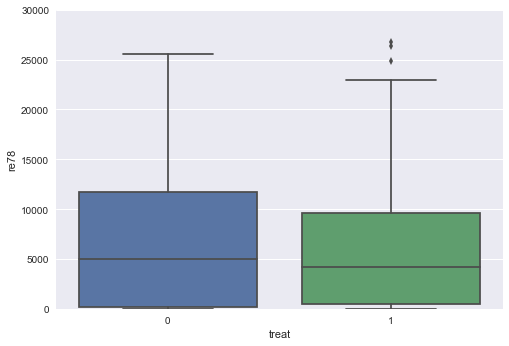

In [4]:
# Extract the two categories.
treat = df[df.treat == 1]
control = df[df.treat == 0]

#Box plot
x = df['treat']
y = df['re78']
ylim = (0,30000)
ax = sbs.boxplot(x=x,y=y)
ax.set(ylim=ylim,)
plt.show()


We limit the y-axis is order to see the mean of the revenues. We see that the mean revenu of the control group is lower than the mean revenu of the control group. Naively, we conclude that the training program do not increase the revenue of the individual. 

## 1.2 A closer look at the data
The naive method is not analytic and smart. Let's learn more about the distribution by analysing by features. We first expose the distribution of each feature. At the end, we analyse them.

### ethnicity
The ethnicity is divided into three category: Black, White or Hispanic.

In [5]:
# This function extract the index that belongs to each category.
def ethnicity(df):
    # Black
    b = df[df.black == 1]
    # Hispanic
    h = df[df.hispan == 1]
    #White
    w = df[(df.black == 0 )& (df.hispan == 0)]
    return (b,h,w)

#Define constance for furthur use
label_treatment = 'treatement' # used for title of the plots.
label_control = 'control'

We use the pie chart representation in order to know the proportion of the individual in each ethny.

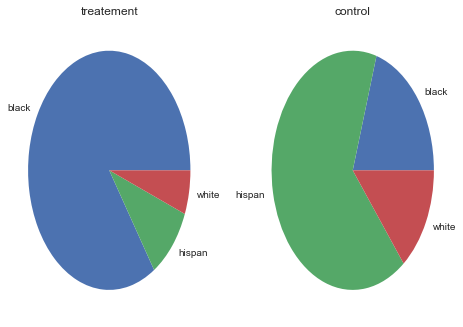

In [6]:
labels_ = ['black', 'hispan' , 'white']

(b_t,h_t,w_t) = ethnicity(treat)
(b_c,h_c,w_c) = ethnicity(control)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.pie(x=[b_t.shape[0],w_t.shape[0],h_t.shape[0]],labels = labels_)
ax1.set_title(label_treatment)
ax2.pie(x=[b_c.shape[0],w_c.shape[0],h_c.shape[0]],labels = labels_)
ax2.set_title(label_control)
plt.show()


In [7]:
# This funtion is used to represent the distribition of the feature.
def plot_dist_bis(t,c):
    sbs.kdeplot(t)
    sbs.kdeplot(c)
    plt.show()    

### Degree 

In [8]:
def pie_2_dist(d,n_d,ax,labels_,title):
    
    ax.pie(x=[d.shape[0],n_d.shape[0]],labels = labels_)
    ax.set_title(title)

               

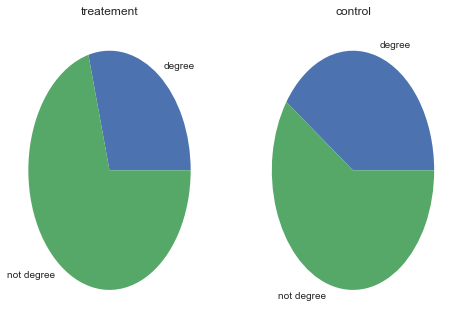

In [9]:
degree_t = treat[treat.nodegree == 0]
not_degree_t = treat[treat.nodegree == 1]

degree_c = control[control.nodegree == 0]
not_degree_c = control[control.nodegree == 1]



fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
labels_ = ['degree' , 'not degree']
pie_2_dist(degree_t,not_degree_t,ax1,labels_,label_treatment)
pie_2_dist(degree_c,not_degree_c,ax2,labels_,label_control)
plt.show()


### Mariage
Let's study the effect on earnings on maried individials.

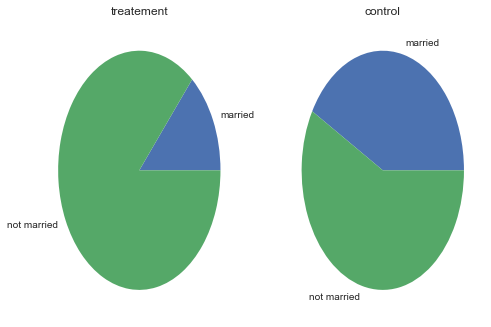

In [10]:
m_t = treat[treat.married == 1]
m_c = treat[treat.married == 0]

not_m_t = control[control.married == 1]
not_m_c = control[control.married == 0]

f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
labels_ = ['married', 'not married']
pie_2_dist(m_t,not_m_t,ax1,labels_, label_treatment)
pie_2_dist(m_c,not_m_c,ax2,labels_, label_control)
plt.show()


### age

/Users/Niro/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


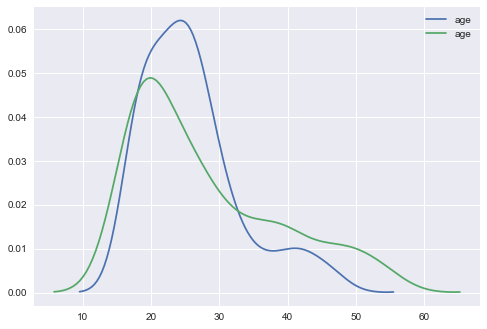

In [11]:
plot_dist_bis(treat['age'], control['age'])


### Education year


/Users/Niro/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


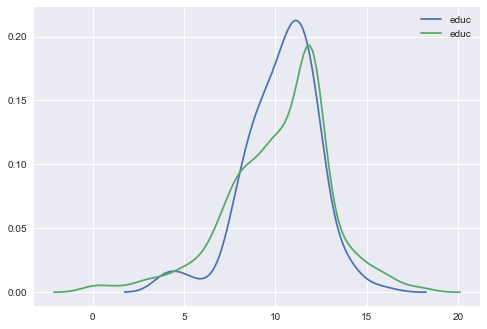

In [12]:
plot_dist_bis(treat['educ'], control['educ'])

### Correlation educ and nodegree
This section answer the following question : Is there any linear correlation between the number years of education and the obtention of the degree?

In [13]:
educ = df['educ']
nodegree = df['nodegree']
nodegree.corr(educ)

-0.7014518555979844

As excepted, the reasoning is obvious. The more year a person study, the more likely he is to obtain a diploma.

### Revenue in 1974

/Users/Niro/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


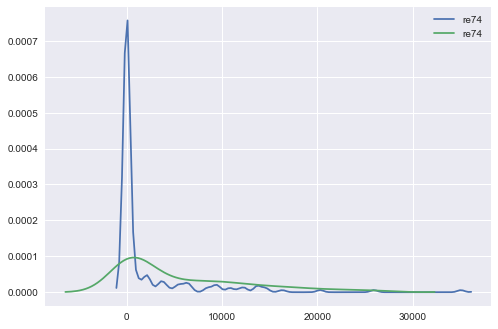

In [14]:
rev74 = 're74'
plot_dist_bis(treat[rev74], control[rev74])

Most of the revenue are 0. One explanation is to assume that missing revenue information are replaced by 0's. Let's see the proportion of the known revenue against unknown.

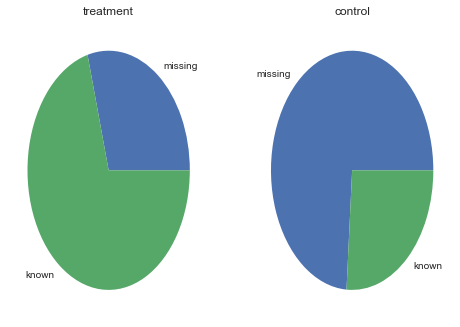

In [15]:
# For the treatment group
re74_t = treat[treat.re74 != 0]
n_re74_t = treat[treat.re74 == 0]

# For the control group
re74_c = control[control.re74 !=0]
n_re74_c = control[control.re74 ==0]

labels_ = ['missing', 'known']

# plot the distribution
f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
pie_2_dist(re74_t,n_re74_t,ax1,labels_ , 'treatment')
pie_2_dist(re74_c,n_re74_c,ax2,labels_ , 'control')
plt.show()

### Revenue in 1975
We do the same with the year 1975

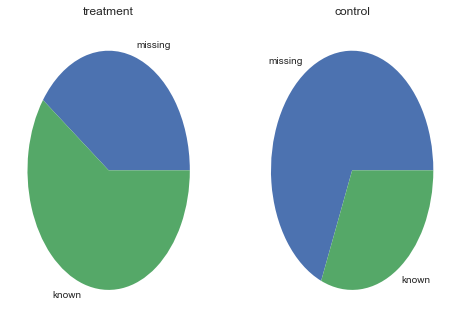

In [16]:
# For the treatment group
re75_t = treat[treat.re75 != 0]
n_re75_t = treat[treat.re75 == 0]

# For the control group
re75_c = control[control.re75 !=0]
n_re75_c = control[control.re75 ==0]

labels_ = ['missing', 'known']

# plot the distribution
f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
pie_2_dist(re75_t,n_re75_t,ax1,labels_ , 'treatment')
pie_2_dist(re75_c,n_re75_c,ax2,labels_ , 'control')
plt.show()


### Analyse

We notice that the distribution of the features are not proportional to the number of individual. For example, for the ethnicity feature, the number of black individual is very large compared to the other ethny in the treatment group. Those diparencies between the 2 groups implies that they are not comparable in the globality. As for the number of individual in a feature or the distribution of them are not proportionnaly equal, the result of the naive comparison imply a non-effectiveness of the training programs.

In order to compare properly the two groups, each treatment row need to be linked with the control group row with the approximative same parameter (features). In order to link, we need to compute the propensity score.

## 1.3 A propensity score model

Recall that propensity score compute using the features the probability of recieving a threatment. 

The computation of the propensity score is straight-forward. We first extract the feature and output pair. Then we train the logistic regression model. By calling ´predict_proba´ we compute the propensity score with is the conditionnal probability that the treatement output is 1 knowing the values of the parameters.

In [18]:
logistic = linear_model.LogisticRegression()
x_key= ['age', 'educ', 'black', 'hispan', 'married' , 'nodegree', 're74', 're75', 're78'] # the list of feature
y_key= ['treat']
X = df[x_key]
y = df[y_key]
logistic.fit(X,y)

y_pred = logistic.predict_proba(X)
df_y_pred = pd.DataFrame(y_pred).drop(0,axis=1)
df_y_pred = df_y_pred.rename_axis({1 : 'propensity match'}, axis =1)

df_prop = pd.concat([df, df_y_pred],axis=1)
df_prop.head()

/Users/Niro/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity match
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.458074
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.151980
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.750966
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.674020
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.670590
